In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = ZZ
R.<X> = PolynomialRing(A,'X')
n = 3
V = VectorSpace(RR,n+1)
x_0 = V.random_element()
y_0 = V.random_element()

In [3]:
def bernstein (i,m):
    return binomial(n,i)*(X**i * (1-X)**(n-i))

In [4]:
def bernstein_rec (m):
    B = zero_matrix(R,m+1)
    B[0,0] = R(1)
    for k in range(1,m+1):
        B[0,k] = (1-X)*B[0,k-1]
        for i in range(1,k+1):
            B[i,k] = (1-X)*B[i,k-1] + X*B[i-1,k-1]
    return B

In [5]:
def bernstein_rec_2 (m):
    B = [R(0)]*(m+1)
    B[0] = R(1)
    for k in range(1,m+1):
        Q = B[0]
        B[0] = (1-X)*B[0]
        for i in range(1,k+1):
            (P,Q)=(Q,B[i])
            B[i] = (1-X)*Q + X*P
    return B

In [6]:
def trace_bernstein (m):
    B = bernstein_rec_2 (m)
    absc = np.linspace(0,1,200)
    plt.close()
    plt.figure(figsize = (14,5))
    plt.clf()
    for i in range(m+1):
        plt.plot(absc, np.vectorize(B[i])(absc))

In [7]:
print(bernstein_rec_2(2))
print(bernstein_rec(2))

[X^2 - 2*X + 1, -2*X^2 + 2*X, X^2]
[            1        -X + 1 X^2 - 2*X + 1]
[            0             X  -2*X^2 + 2*X]
[            0             0           X^2]


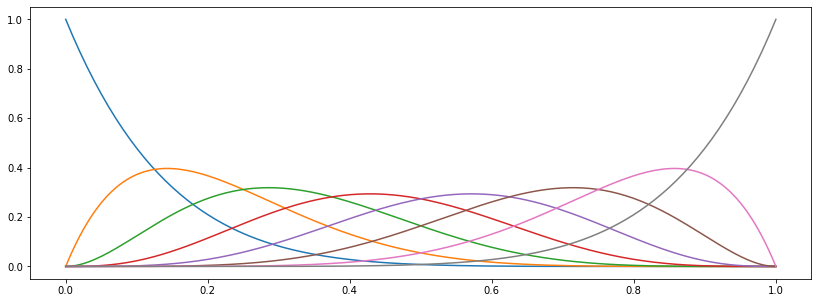

In [8]:
trace_bernstein(7)

In [9]:
def courbe_bezier (x,y):
    m = len(x)-1
    B = bernstein_rec_2(m)
    Cx = np.vectorize (sum([x[i]*B[i] for i in range(m+1)]))
    Cy = np.vectorize (sum([y[i]*B[i] for i in range(m+1)]))
    return Cx,Cy

In [10]:
def trace_bezier (x,y):
    m = len(x)-1
    minx = min(x)
    maxx = max(x)
    miny = min(y)
    maxy = max(y)
    dx = (maxx - minx)/10
    dy = (maxy - miny)/10
    Cx,Cy = courbe_bezier (x,y)
    
    pts = np.linspace(0, 1,500)
    
    plt.close()
    plt.figure(figsize = (10,10))
    plt.clf()
    plt.xlim(minx-dx,maxx+dx)
    plt.ylim(miny-dy,maxy+dy)
    plt.plot(Cx(pts),Cy(pts))
    plt.plot(x,y,marker = 'o')
    plt.plot(x[0:2],y[0:2])
    plt.plot(x[m-1:m+1],y[m-1:m+1])

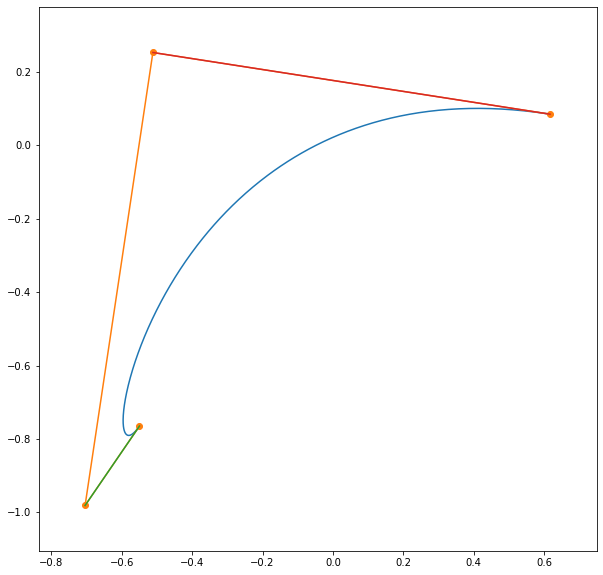

In [11]:
trace_bezier (x_0,y_0)

In [12]:
def dist (a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [13]:
def renverse (mat):
    r,s = np.shape(mat)
    return matrix([[mat[s-j-1,r-i-1] for i in range(r)] for j in range(s)])

In [14]:
def subdivision (x,y,epsilon):
    m = len(x)-1
    S1 = matrice_S (m)
    S2 = renverse(S1)
    m = len(x)-1
    if dist ((x[0],y[0]),(x[m],y[m])) < epsilon:
        return [(x[0],y[0]),(x[m],y[m])]
    else:
        liste_P1 = subdivision(x*S1,y*S1,epsilon)
        liste_P2 = subdivision(x*S2,y*S2,epsilon)
        return liste_P1 + liste_P2[1:]

In [15]:
def matrice_M (m):
    B = bernstein_rec_2(m)
    M = zero_matrix(A,m+1)
    for i in range(m+1):
        for (a,j) in zip(B[i].coefficients(),B[i].exponents()):
            M[i,j] = a
    return M

In [16]:
def matrice_S (m):
    M = matrice_M(m)
    T = diagonal_matrix([1/2**k for k in range(m+1)])
    return M * T * M.inverse()

In [17]:
def separation (liste):
    return ([e[0] for e in liste],[e[1] for e in liste])

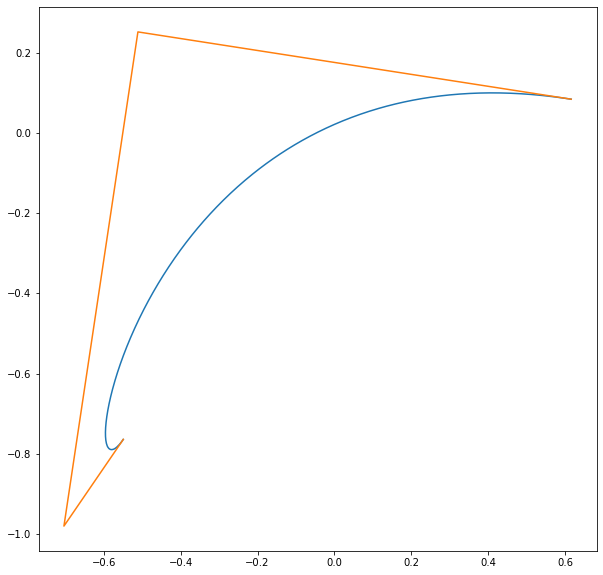

In [18]:
lx,ly = separation(subdivision(x_0,y_0,0.005))
plt.close()
plt.figure(figsize = (10,10))
plt.clf()
plt.plot(lx,ly)
plt.plot(x_0,y_0)

In [19]:
len(lx)

498